<a href="https://colab.research.google.com/github/raulFuzita/cct-4-year/blob/psi-final-project/problem_solving_for_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Solving for Industry

Lecturer: Dr. Muhammad Iqbal

Students Information

David Silva - 2018264

Luiz Augusto Dias - 2018429

Raul Macedo Fuzita - 2018337

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/raulFuzita/cct-4-year/psi-final-project/data/daft_ie_v1.csv')

In [69]:
df.shape

(3967, 22)

In [70]:
df.columns

Index(['id', 'title', 'featuredLevel', 'publishDate', 'price', 'numBedrooms',
       'numBathrooms', 'propertyType', 'propertySize', 'category', 'AMV_price',
       'sellerId', 'seller_name', 'seller_branch', 'sellerType',
       'm_totalImages', 'm_hasVideo', 'm_hasVirtualTour', 'm_hasBrochure',
       'ber_rating', 'longitude', 'latitude'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


In [72]:
df.describe()

,id,price,numBedrooms,numBathrooms,propertySize,AMV_price,sellerId,m_totalImages,longitude,latitude
count,3.967000e+03,3.967000e+03,3967.000000,3967.000000,3612.000000,3967.000000,3.967000e+03,3967.000000,3967.000000,3967.000000
mean,3.629047e+06,3.416734e+05,3.126292,2.077136,132.673865,0.047391,2.163815e+04,18.448954,-7.389964,53.133816
std,2.502479e+05,2.703582e+05,1.230570,1.167772,295.246580,0.212500,2.541506e+05,10.537226,1.865587,0.716435
min,1.092100e+04,2.000000e+04,1.000000,1.000000,1.000000,0.000000,7.000000e+00,0.000000,-100.445882,39.783730
25%,3.654066e+06,1.950000e+05,2.000000,1.000000,78.000000,0.000000,2.178000e+03,12.000000,-8.426627,52.666116
50%,3.673795e+06,2.750000e+05,3.000000,2.000000,103.000000,0.000000,3.255000e+03,17.000000,-7.050391,53.303346
75%,3.685990e+06,3.950000e+05,4.000000,3.000000,137.000000,0.000000,8.806000e+03,23.000000,-6.298945,53.438722
max,3.695402e+06,4.500000e+06,23.000000,23.000000,8600.000000,1.000000,5.310328e+06,104.000000,-6.028016,55.299693


In [73]:
df.head(3)

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493


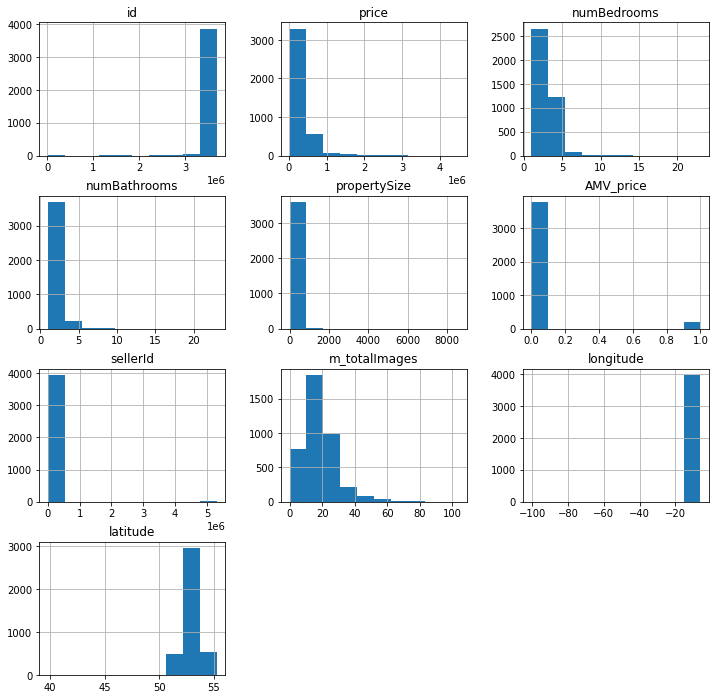

In [74]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 12))
plt.show()

In [75]:
df['AMV_price'].unique()

array([0, 1])

category: ['Buy' 'New Homes'] (Buy means the houses listed under Buy menu in the websites)


AMVprice: Advised minimum value (some properties have AMV price. The price column was mixed with regular price and AMV price, created a new column for AMV price to flag if it is AMV or not.)

In [76]:
df['AMV_price'].unique()

array([0, 1])

sellerId: Seller's Id

sellername: Seller's name

sellerbranch: Seller's branch if it is an agency.

sellerType: ['BRANDEDAGENT' 'UNBRANDEDAGENT' 'PRIVATEUSER']

m_totalImages: Total images posted on the website.

m_hasVideo: Whether the property posted a video or not.

m_hasVirtualTour: Whether the property has a virtual tour or not.

m_hasBrochure: Whether the property has a brochure or not.

ber_rating: ['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI666' 'F' 'E2' 'B2' 'XXX', 'A2,''B1' 'A1' 'A1A2']
(XXX means the rating was missing)

In [77]:
# count how many rows have XXX value in ber_rating
df[df['ber_rating'] == 'XXX'].shape[0]

169

In [78]:
delete_columns = ['id','featuredLevel', 'category', 'AMV_price','sellerId', 'seller_name', 'seller_branch', 'sellerType', 'm_totalImages', 'm_hasVideo', 'm_hasVirtualTour', 'm_hasBrochure', 'ber_rating']

In [79]:
df.drop(delete_columns, axis=1, inplace=True)

In [80]:
df.head()

,title,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude
0,"11 Chestnut Crescent, Bridgemount, Carrigaline...",2022-01-28,290000,3,3,End of Terrace,96.0,-8.382500,51.822940
1,"58 The Glen, Kilnacourt Woods, Portarlington, ...",2022-01-28,225000,3,2,Semi-D,93.0,-7.177098,53.157465
2,"16 Dodderbrook Park, Ballycullen, Dublin 24",2022-01-27,575000,4,3,Semi-D,162.0,-6.342763,53.269493
3,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",2022-01-28,299000,3,3,Semi-D,NaN,-8.640716,52.629588
4,"5 Columba Terrace, Kells, Co. Meath",2022-01-28,120000,3,1,Terrace,68.0,-6.879797,53.728601


In [81]:
df.isnull().sum()

title             0
publishDate       0
price             0
numBedrooms       0
numBathrooms      0
propertyType      0
propertySize    355
longitude         0
latitude          0
dtype: int64

In [82]:
# remove all NA values from df
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

title           0
publishDate     0
price           0
numBedrooms     0
numBathrooms    0
propertyType    0
propertySize    0
longitude       0
latitude        0
dtype: int64

In [84]:
# check if there are any duplicates
df.duplicated().sum()

0

In [85]:
# show unique values of featuredLevel
print('Property Type:', df['propertyType'].unique())

Property Type: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']


In [86]:
# encode with label encoder for featuredLevel

# create label encoder object
le = LabelEncoder()
# convert propertyType labels into numbers
df['encoded_propertyType'] = le.fit_transform(df['propertyType'])

In [87]:
print('Property Type:', df['propertyType'].unique())
print('Encoded Type:', df['encoded_propertyType'].unique())

Property Type: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']
Encoded Type: [ 4  6  9  2  0  1 10  3  7  8  5]


In [88]:
df.head()

,title,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType
0,"11 Chestnut Crescent, Bridgemount, Carrigaline...",2022-01-28,290000,3,3,End of Terrace,96.0,-8.382500,51.822940,4
1,"58 The Glen, Kilnacourt Woods, Portarlington, ...",2022-01-28,225000,3,2,Semi-D,93.0,-7.177098,53.157465,6
2,"16 Dodderbrook Park, Ballycullen, Dublin 24",2022-01-27,575000,4,3,Semi-D,162.0,-6.342763,53.269493,6
4,"5 Columba Terrace, Kells, Co. Meath",2022-01-28,120000,3,1,Terrace,68.0,-6.879797,53.728601,9
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000,4,3,Semi-D,113.0,-8.614786,51.883612,6


In [89]:
df['ordinal_date'] = pd.to_datetime(df['publishDate'])
df['ordinal_date']=df['ordinal_date'].map(dt.datetime.toordinal)
df.head()

,title,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType,ordinal_date
0,"11 Chestnut Crescent, Bridgemount, Carrigaline...",2022-01-28,290000,3,3,End of Terrace,96.0,-8.382500,51.822940,4,738183
1,"58 The Glen, Kilnacourt Woods, Portarlington, ...",2022-01-28,225000,3,2,Semi-D,93.0,-7.177098,53.157465,6,738183
2,"16 Dodderbrook Park, Ballycullen, Dublin 24",2022-01-27,575000,4,3,Semi-D,162.0,-6.342763,53.269493,6,738182
4,"5 Columba Terrace, Kells, Co. Meath",2022-01-28,120000,3,1,Terrace,68.0,-6.879797,53.728601,9,738183
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000,4,3,Semi-D,113.0,-8.614786,51.883612,6,738185


In [90]:
df['year'] = pd.to_datetime(df['publishDate'])
df['year'].values.astype('datetime64[Y]')
df['year'] = pd.DatetimeIndex(df['year']).year
df.head()

,title,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType,ordinal_date,year
0,"11 Chestnut Crescent, Bridgemount, Carrigaline...",2022-01-28,290000,3,3,End of Terrace,96.0,-8.382500,51.822940,4,738183,2022
1,"58 The Glen, Kilnacourt Woods, Portarlington, ...",2022-01-28,225000,3,2,Semi-D,93.0,-7.177098,53.157465,6,738183,2022
2,"16 Dodderbrook Park, Ballycullen, Dublin 24",2022-01-27,575000,4,3,Semi-D,162.0,-6.342763,53.269493,6,738182,2022
4,"5 Columba Terrace, Kells, Co. Meath",2022-01-28,120000,3,1,Terrace,68.0,-6.879797,53.728601,9,738183,2022
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000,4,3,Semi-D,113.0,-8.614786,51.883612,6,738185,2022


In [91]:
rename_columns = {'title': 'address', 'price': 'sale_price', 'numBedrooms': 'bedrooms', 'numBathrooms': 'bathrooms', 'propertySize': 'property_size', 'encoded_propertyType': 'property_type'}
# rename df columns
df.rename(columns=rename_columns, inplace=True)
df.columns

Index(['address', 'publishDate', 'sale_price', 'bedrooms', 'bathrooms',
       'propertyType', 'property_size', 'longitude', 'latitude',
       'property_type', 'ordinal_date', 'year'],
      dtype='object')

In [92]:
# drop the columns publishDate, propertyType
df.drop(['publishDate', 'propertyType'], axis=1, inplace=True)
df.columns

Index(['address', 'sale_price', 'bedrooms', 'bathrooms', 'property_size',
       'longitude', 'latitude', 'property_type', 'ordinal_date', 'year'],
      dtype='object')

In [93]:
# retrive all records where address contains 'Dublin' word
dublin = df[df['address'].str.contains('Dublin')]

In [94]:
dublin.iloc[:,range(1,10)]

,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,ordinal_date,year
2,575000,4,3,162.0,-6.342763,53.269493,6,738182,2022
10,320000,2,2,70.0,-6.323471,53.377173,0,738181,2022
12,275000,2,1,58.0,-6.421765,53.395523,6,738183,2022
14,490000,3,3,108.0,-6.282095,53.396259,2,738185,2022
15,625000,3,3,95.0,-6.256121,53.362106,9,738166,2022
...,...,...,...,...,...,...,...,...,...
3931,290000,1,1,50.0,-6.227660,53.270672,0,738134,2021
3935,625000,3,2,107.0,-6.259710,53.323485,6,738130,2021
3948,425000,2,1,57.0,-8.333917,51.901127,9,738185,2022
3949,425000,2,1,52.0,-7.248005,52.653467,9,738185,2022


In [95]:
keep_columns = ['sale_price', 'bedrooms', 'bathrooms', 'property_size', 'longitude', 'latitude', 'property_type', 'year']
dublin.loc[:,keep_columns]

,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,year
2,575000,4,3,162.0,-6.342763,53.269493,6,2022
10,320000,2,2,70.0,-6.323471,53.377173,0,2022
12,275000,2,1,58.0,-6.421765,53.395523,6,2022
14,490000,3,3,108.0,-6.282095,53.396259,2,2022
15,625000,3,3,95.0,-6.256121,53.362106,9,2022
...,...,...,...,...,...,...,...,...
3931,290000,1,1,50.0,-6.227660,53.270672,0,2021
3935,625000,3,2,107.0,-6.259710,53.323485,6,2021
3948,425000,2,1,57.0,-8.333917,51.901127,9,2022
3949,425000,2,1,52.0,-7.248005,52.653467,9,2022


In [96]:
dfmmn = dublin.loc[:,keep_columns].copy()
column_names = dfmmn.columns

x = dfmmn.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfmmn = pd.DataFrame(x_scaled)
dfmmn.columns = column_names
dfmmn.head()

,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,year
0,0.107955,0.428571,0.285714,0.016247,0.928806,0.467627,0.6,1.0
1,0.050000,0.142857,0.142857,0.004837,0.933301,0.495863,0.0,1.0
2,0.039773,0.142857,0.000000,0.003349,0.910400,0.500675,0.6,1.0
3,0.088636,0.285714,0.285714,0.009550,0.942942,0.500868,0.2,1.0
4,0.119318,0.285714,0.285714,0.007937,0.948993,0.491912,0.9,1.0


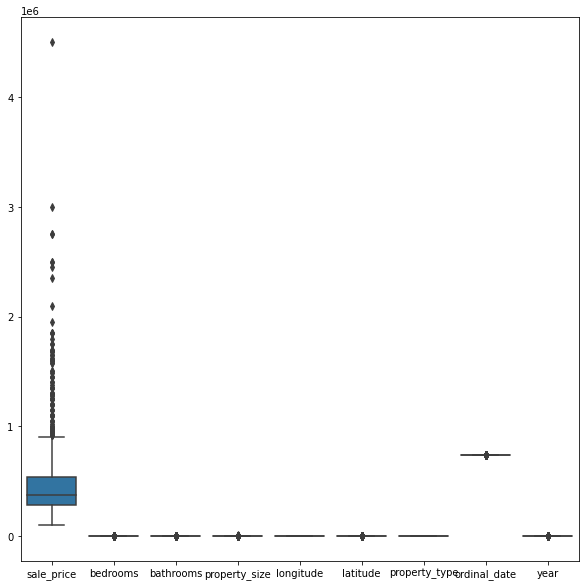

In [97]:
# plot a boxplot of all of df columns
# figure size (width, height)
plt.figure(figsize=(10,10))
# plot a seaborn boxplot of all of df columns
sns.boxplot(data=dublin)
# show plot
plt.show()

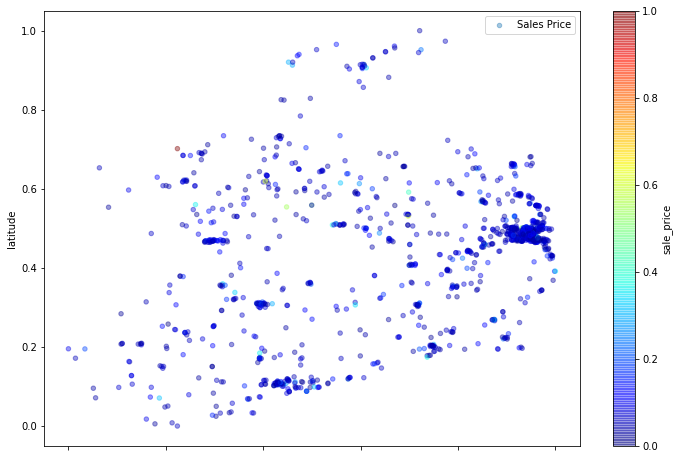

In [98]:
dfmmn.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='Sales Price',
figsize=(12, 8), c='sale_price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()